<a href="https://colab.research.google.com/github/toraaglobal/TextMining/blob/master/text_classification_exploratory_analysis_of_muller_report_on_russian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


![](https://www.toraaglobal.com/wp-content/uploads/2019/04/muller-report.jpg)
***
**Name:  Tajudeen Abdulazeez**
**Email:  'toabdula@syr.edu**

***


## Introduction

The Mueller Report, formally titled the Report on the Investigation into Russian Interference in the 2016 Presidential Election, is the official report documenting the findings of the Special Counsel investigation, led by Robert Mueller, into Russian efforts to interfere in the 2016 United States presidential election, allegations of coordination between Donald Trump's presidential campaign and Russia, and allegations of obstruction of justice. A redacted version of the 448-page report was publicly released by Attorney General William Barr and the Department of Justice (DOJ) on April 18, 2019.
Can a machine give us a great insight of content of the over 400 pages of the special council Muller’s report? We will find out at the end of this article. 
Before we begin, lets have a brief introduction on how computer understand text. As we human can read text, computer understand it as number by counting, which is known as vectorization and this vector, derived from the vectorization process can be used in classifying text into different categories or determining the sentiment polarity of a text document.
Now let’s get brief dive into what sentiment analysis is and what Is document vectorization.
Sentiment analysis is the type of text research that involved the use of statistics, natural language processing and machine learning to identify and extract subjective information from text, for instance, a reviewer’s feelings, thoughts, judgments, or assessments about a topic, event, or a company and its activities as mentioned above. It can also be categorized under a predictive text mining for text categorization.
Sentiment analysis can be broadly categorized into two depending on the scale:
1.	Coarse-grained sentiment analysis
2.	Fine-grained sentiment analysis
Corse-grained sentiment analysis is done on a document and sentence levels. This entails two coherent tasks: Subjective classification and sentiment detection and classification. 
Subjective classification: It first determined if a sentence or document is subjective or objective. An Objective sentence contains some fact about an object or topic.
Sentiment detection and classification: The goal here is to first determine if a sentence has sentiment of not, if it does, to determine the emotion if it is positive, negative or neutral.
Fine-grained sentiment analysis is analyzing sentences by part and each part is analyzed in connection to others. The sentences are broken down into phrases. This analysis is carried out at sub-sentence levels and it is meant to identify a target topic of a sentiment.
Vectorization is the process of transforming text document in a way computer can understand. The only way a computer can understand text is to represent with number which is call text vectorization. This is an important step in data mining. Each word represented by a number is called a token.
Tokenization rules can vary depending on the business problems and how grouping of words can have significant impact in identifying trend in text document. The tokens can be represented with n-grams or bag of words. Bag of word tokens ignore the context of words while n-grams while n-grams capture the local content of words, the representation can be unigrams, token of individual words, bi-grams, token of two words, tri-grams, token of three words and so on.
There are four major different type of converting text to a vector for computer to understand.
1.	Boolean
2.	Term frequency
3.	Normalized term frequency
4.	Tf*idf
Boolean is a vectorization method where each token is represented either if it is present in a document or not. If a token is present, it is represented by 1 and 0 otherwise.

Term Frequency is a vectorization method where each token is represented by the number of occurrences in a document. If you a document and a token appeared in the document 5 times, the token or word will be represented by 5.

Normalize term frequency is a method of vectorization where word frequency is normalized by the document length. If you have a document with a length of 1000, and a word appeared in the document for 20 times, the normalized term frequency will be 20/1000.

Tf*idf is a concept borrowed from information retriever, and it’s a blind weighting strategy for text classification. in this method, the term frequency is multiplying by the inverse document frequency. This is aimed to penalize the common word across documents.

Now that we understand how computer understand document, we will apply this techniques in attempting to gain insight from the Special Council Robert Muller report on Russian interference on US election.


## Analysis

**About Data **
The document is contains 448  pages in pdf format, the report is  downloaded from the cnn new  website. The analysis is carried out using python programming languate and the following packages:
* 	PyPDF2 : to read the pdf document and extract the text content of the document in other to convert if to what computer can understad, which is vectors as discussed in the introductory section.
* 	Wordcloud: to visualized the most occurrence of word tokens in the text document using wordcloud.
* 	Pandas: for dataframe manipulation.
* 	Numpy: for numerical computing
* 	Matplotlib: for data visualization
* 	Kmeans: Clustering
* 	Nltk: for sentiment analysis using vader 

Let begins by getting the views of the first 5 pages of the document, what are the most occurrence words in the first five pages of this document? 


In [0]:
#Mount the gdrive
from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#install dependency
!pip install PyPDF2
!pip install nltk
import nltk
nltk.download('punkt')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
# import packages

import PyPDF2
import os
import inspect
import json
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt


#change directry to the gdrive

os.chdir('./drive/My Drive/Colab Notebooks/code')

import text_mining as tx #user define function

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [0]:
#muller document path in pdf
path  = "../data/mueller-report-searchable.pdf"

#read the pdf and extract the text from the pdf

allText  = []

with open(path, 'rb') as f:
        reader = PyPDF2.PdfFileReader(f)
        print('This PDF has {} number of pages.'.format(reader.numPages))
        for pg in range(reader.numPages):
            page = reader.getPage(pg)
            raw_text = page.extractText()
            text = raw_text.replace('\n\n', '\n')
            allText.append(text)

This PDF has 448 number of pages.


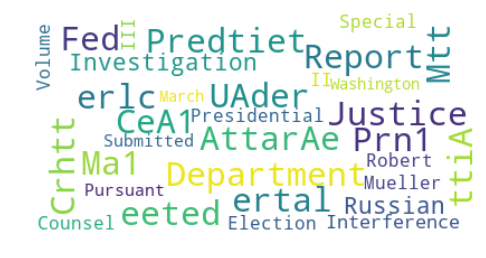

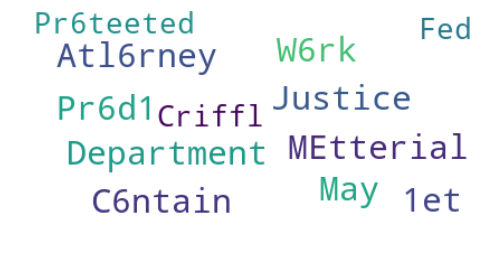

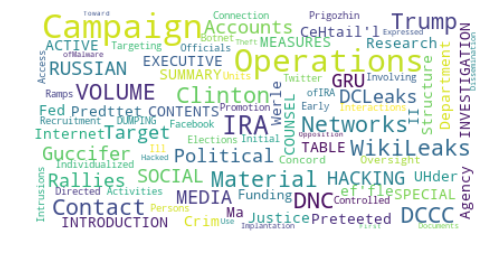

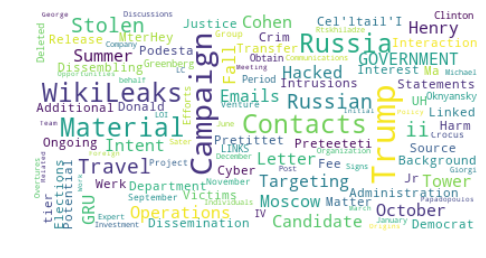

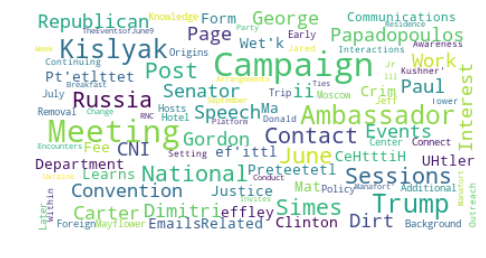

In [0]:
# function to generate a wordcloud

def generate_wordcloud(text, max_font_size=30, max_words=500, background_color="white"):
    '''generate word cloud from text '''
    wordcloud = WordCloud(max_font_size=max_font_size, background_color=background_color).generate(text)
    #display generated image
    plt.figure(figsize=(8,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    #figname = str(text) + '.png'
    #plt.savefig(figname)
    plt.show()
    

# generate the wordcloud of the first five pages of the document
for i in range(5):
    generate_wordcloud(allText[i])

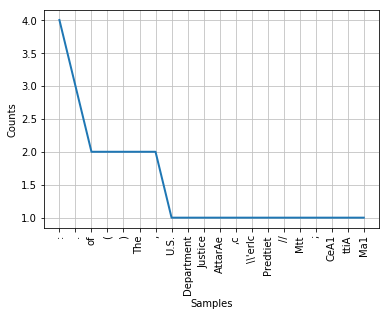

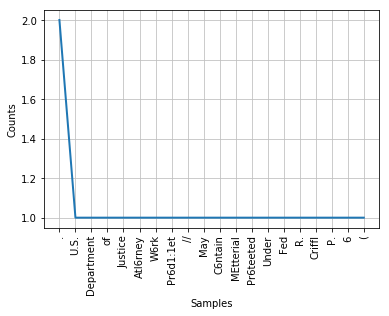

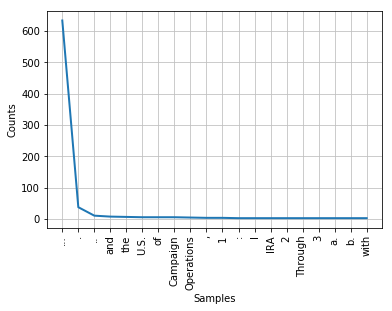

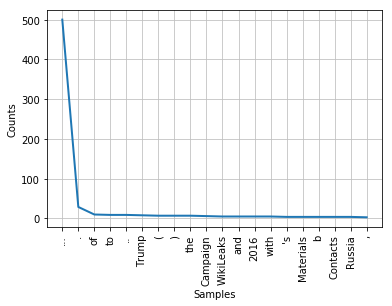

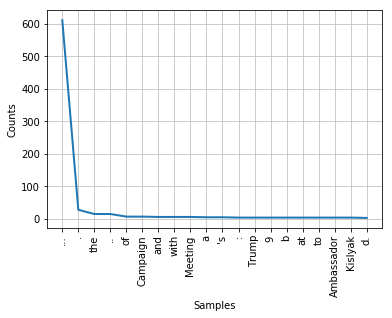

In [0]:
#generate frequency plot of the first five pages
for i in range(5):
    _ = tx.generate_freq_plot(allText[i])

Let’s begin form the first page, the most occurrence words are Department, Justice, Interference, Presidential, Election, Russian etc. These are inline with the document intent as we know the document is about investigation of Russian interference in US presidential election. 

Taken a look at page 1 to 5-word cloud, we can see that the most occurrence words are in line with the document intent which validate the insight from the document.
Let’s get an understand of  the sentiment of the first five pages before getting dive into the whole document.

Using vader from the nltk packages to the sentiment polarity of the first five pages. Below is the sentiment generated for each page of the first five:


## Sentiment Analysis

In [0]:
# import packages for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize
nltk.download('vader_lexicon')


#sentiment analysis of the first five pages

sid = SentimentIntensityAnalyzer() #initialize the sentiment analyzer

for i in range(5):
    ss = sid.polarity_scores(allText[i])
    print(ss)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
{'neg': 0.0, 'neu': 0.885, 'pos': 0.115, 'compound': 0.7269}
{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.5267}
{'neg': 0.029, 'neu': 0.936, 'pos': 0.035, 'compound': 0.4084}
{'neg': 0.062, 'neu': 0.907, 'pos': 0.03, 'compound': -0.8934}
{'neg': 0.009, 'neu': 0.945, 'pos': 0.047, 'compound': 0.891}


## Clustering

(448, 11338)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


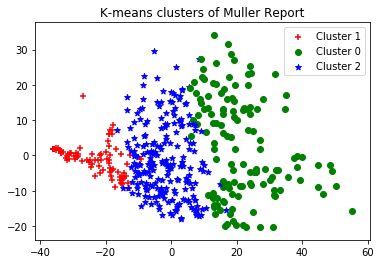

In [0]:
#vectorization and clustering of the documents

import sklearn
from sklearn.feature_extraction.text import CountVectorizer
MyVectorizer1=CountVectorizer(
        input='content', ## can be set as 'content', 'file', or 'filename'
        #If set as ‘filename’, the **sequence passed as an argument to fit**
        #is expected to be a list of filenames 
        #https://scikit-learn.org/stable/modules/generated/
        ##sklearn.feature_extraction.text.CountVectorizer.html#
        ##examples-using-sklearn-feature-extraction-text-countvectorizer
        encoding='latin-1',
        decode_error='ignore', #{‘strict’, ‘ignore’, ‘replace’}
        strip_accents=None, # {‘ascii’, ‘unicode’, None}
        lowercase=True, 
        preprocessor=None, 
        tokenizer=None, 
        #stop_words='english', #string {‘english’}, list, or None (default)
        stop_words='english',
        token_pattern='(?u)\b\w\w+\b', #Regular expression denoting what constitutes a “token”
        ngram_range=(1, 1), 
        analyzer='word', 
        max_df=1.0, # ignore terms w document freq strictly > threshold 
        min_df=1, 
        max_features=None, 
        vocabulary=None, 
        binary=False, #If True, all non zero counts are set to 1
        #dtype=<class 'numpy.int64'> 
        )

MyVect =CountVectorizer(input='content')


vecs =MyVect.fit_transform(allText)

ColumnNames =MyVect.get_feature_names()

#create a dataframe

mullerDF =pd.DataFrame(vecs.toarray(),columns=ColumnNames)
print(mullerDF.shape)



# create a matrix
mullerDFmatrix = mullerDF.values


# Clustering 
from sklearn.cluster import KMeans


kmeans_object = KMeans(n_clusters=3)
print(kmeans_object)

kmeans_object.fit(mullerDFmatrix)
# Get cluster assignment labels
labels = kmeans_object.labels_




from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(mullerDFmatrix)
pca_2d = pca.transform(mullerDFmatrix)




for i in range(0, pca_2d.shape[0]):
    if kmeans_object.labels_[i] == 1:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
    elif kmeans_object.labels_[i] == 0:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
    elif kmeans_object.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')
plt.legend([c1, c2, c3],['Cluster 1', 'Cluster 0','Cluster 2'])
plt.title('K-means clusters of Muller Report')
plt.show() 


There seam to be a clear separation of the document into three clusters, there might be a categorization pattern happening here. Let’s try using 2 cluster assignment.

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


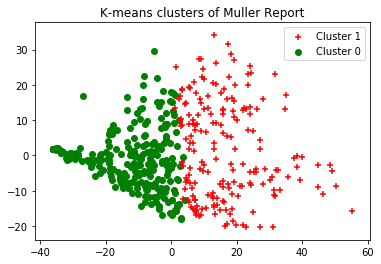

In [0]:

kmeans_object2 = KMeans(n_clusters=2)
print(kmeans_object2)



kmeans_object2.fit(mullerDFmatrix)
# Get cluster assignment labels
labels2 = kmeans_object2.labels_



for i in range(0, pca_2d.shape[0]):
    if kmeans_object2.labels_[i] == 1:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
    elif kmeans_object2.labels_[i] == 0:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
   
plt.legend([c1, c2],['Cluster 1', 'Cluster 0'])
plt.title('K-means clusters of Muller Report')
plt.show()  

From the Kmeans clustering of the report, we can see a clear segmentation of the report around the horizontal zero, one segment on the positive axis and the other segment on the negative axis. We can infer a clear pattern in the document.


Let’s view the heatmap of the pca to visualize a possible trend or pattern in the document.
The heatmap generated from the PCA is shown below:


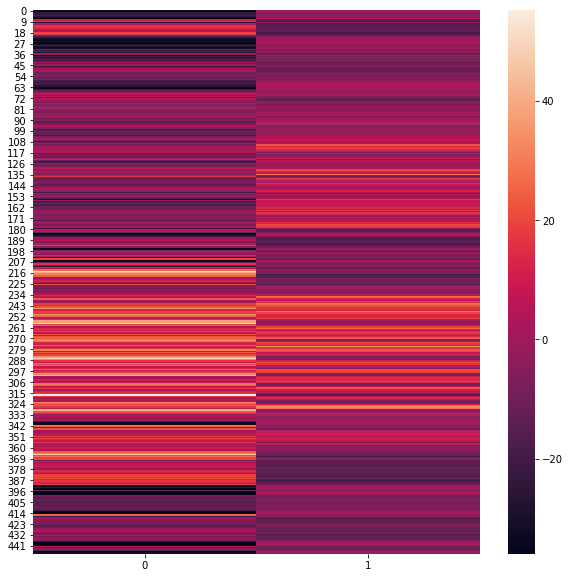

In [0]:
import seaborn as sns

plt.figure(figsize=(10,10))

sns.heatmap(pca_2d)

plt.show()

The way computer understand document is by counting, we can see from the heatmap that the token distribution between cluster 0 and 1 varies across the heatmap with varying intensity.






## Result
* Word cloud
The most frequent word as shown in the word cloud is inline with the document intent of Russian interference in US election.  Words like Department, Investigation, Interference, Justice, Election, Russian, Collusion, etc. dominate the document.
* Sentiment Analysis
The sentiment distribution across the document varies. From the sentiment of the first five pages, the first two pages has a negative sentiment of 0 but negative sentiment started setting in at page 3 to 5 but the neutral polarity still dominate. This shows that computer can communicate to us just by counting numbers in document.
* Clustering
The cluster assignment using Kmeans shows a clear pattern, this is telling us that there is a clear segmentation of the document along a clear boundary. In other to get a better understanding of the document more work need to be done in classifying the document intent and sentiment. But since our goals is to understand if computer can give us a broader intent of a document. This goal seems to be actualized.

## Conclusion

We can conclude that using text mining techniques, details insight or document intent can be determined. Just by counting, the most occurrence word in a document, it can give us the overall content of what the document is talking about. From this analysis, we know that the document content is inline with the intent which is Russian interference with US presidential election. The word cloud quickly points us to this direction by visualizing the most occurrence words in the documents.
The clear separation in the 2-cluster assignment also give an assumption of polarity by pollical affiliation as the US has two major pollical party with diverse opinion on the subject matter.





* Reference
https://en.wikipedia.org/wiki/Mueller_Report

* my homework 1 and 2
